In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler

In [2]:
#cirrhosis_df = pd.read_csv("C:\\Users\\parim\\Downloads\\MC_Cirrhosis Outcomes\\train.csv")
cirrhosis_df = pd.read_csv("/kaggle/input/playground-series-s3e26/train.csv")

In [3]:
cirrhosis_df.shape

(7905, 20)

In [4]:
cirrhosis_df.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [5]:
cirrhosis_df['Status'].unique()

array(['D', 'C', 'CL'], dtype=object)

In [6]:
cirrhosis_df.head(5)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [7]:
cirrhosis_df.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [8]:
print(f"Drug unique value: {cirrhosis_df['Drug'].unique()}")
print(f"Ascites unique value: {cirrhosis_df['Ascites'].unique()}")
print(f"Hepatomegaly unique value: {cirrhosis_df['Hepatomegaly'].unique()}")
print(f"Spiders unique value: {cirrhosis_df['Spiders'].unique()}")
print(f"Edema unique value: {cirrhosis_df['Edema'].unique()}")
print(f"Sex unique value: {cirrhosis_df['Sex'].unique()}")

Drug unique value: ['D-penicillamine' 'Placebo']
Ascites unique value: ['N' 'Y']
Hepatomegaly unique value: ['N' 'Y']
Spiders unique value: ['N' 'Y']
Edema unique value: ['N' 'Y' 'S']
Sex unique value: ['M' 'F']


In [9]:
cirrhosis_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [10]:
cirrhosis_df['Status'].value_counts()

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

Training dataset is highly imbalanced among the three classes, like for Class C around 63%, class D around 34% and class CL around  -3% out of 7905 records

In [11]:
categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
cirrhosis_df_encoded = pd.get_dummies(cirrhosis_df, columns=categorical_cols, dtype=int)
status_dict = {'C':0, 'CL':1, 'D':2}
cirrhosis_df_encoded["Status"] = cirrhosis_df_encoded["Status"].replace(status_dict)


In [12]:
cirrhosis_df_encoded.head(5)

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,...,1,1,0,1,0,1,0,1,0,0
1,1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,...,0,1,0,1,0,1,0,1,0,0
2,2,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,...,0,1,0,0,1,0,1,0,0,1
3,3,2576,18460,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,...,0,1,0,1,0,1,0,1,0,0
4,4,788,16658,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,...,0,1,0,0,1,1,0,1,0,0


In [13]:
cirrhosis_df_encoded["Status"]

0       2
1       0
2       2
3       0
4       0
       ..
7900    0
7901    0
7902    2
7903    2
7904    0
Name: Status, Length: 7905, dtype: int64

Text(0, 0.5, 'Stage')

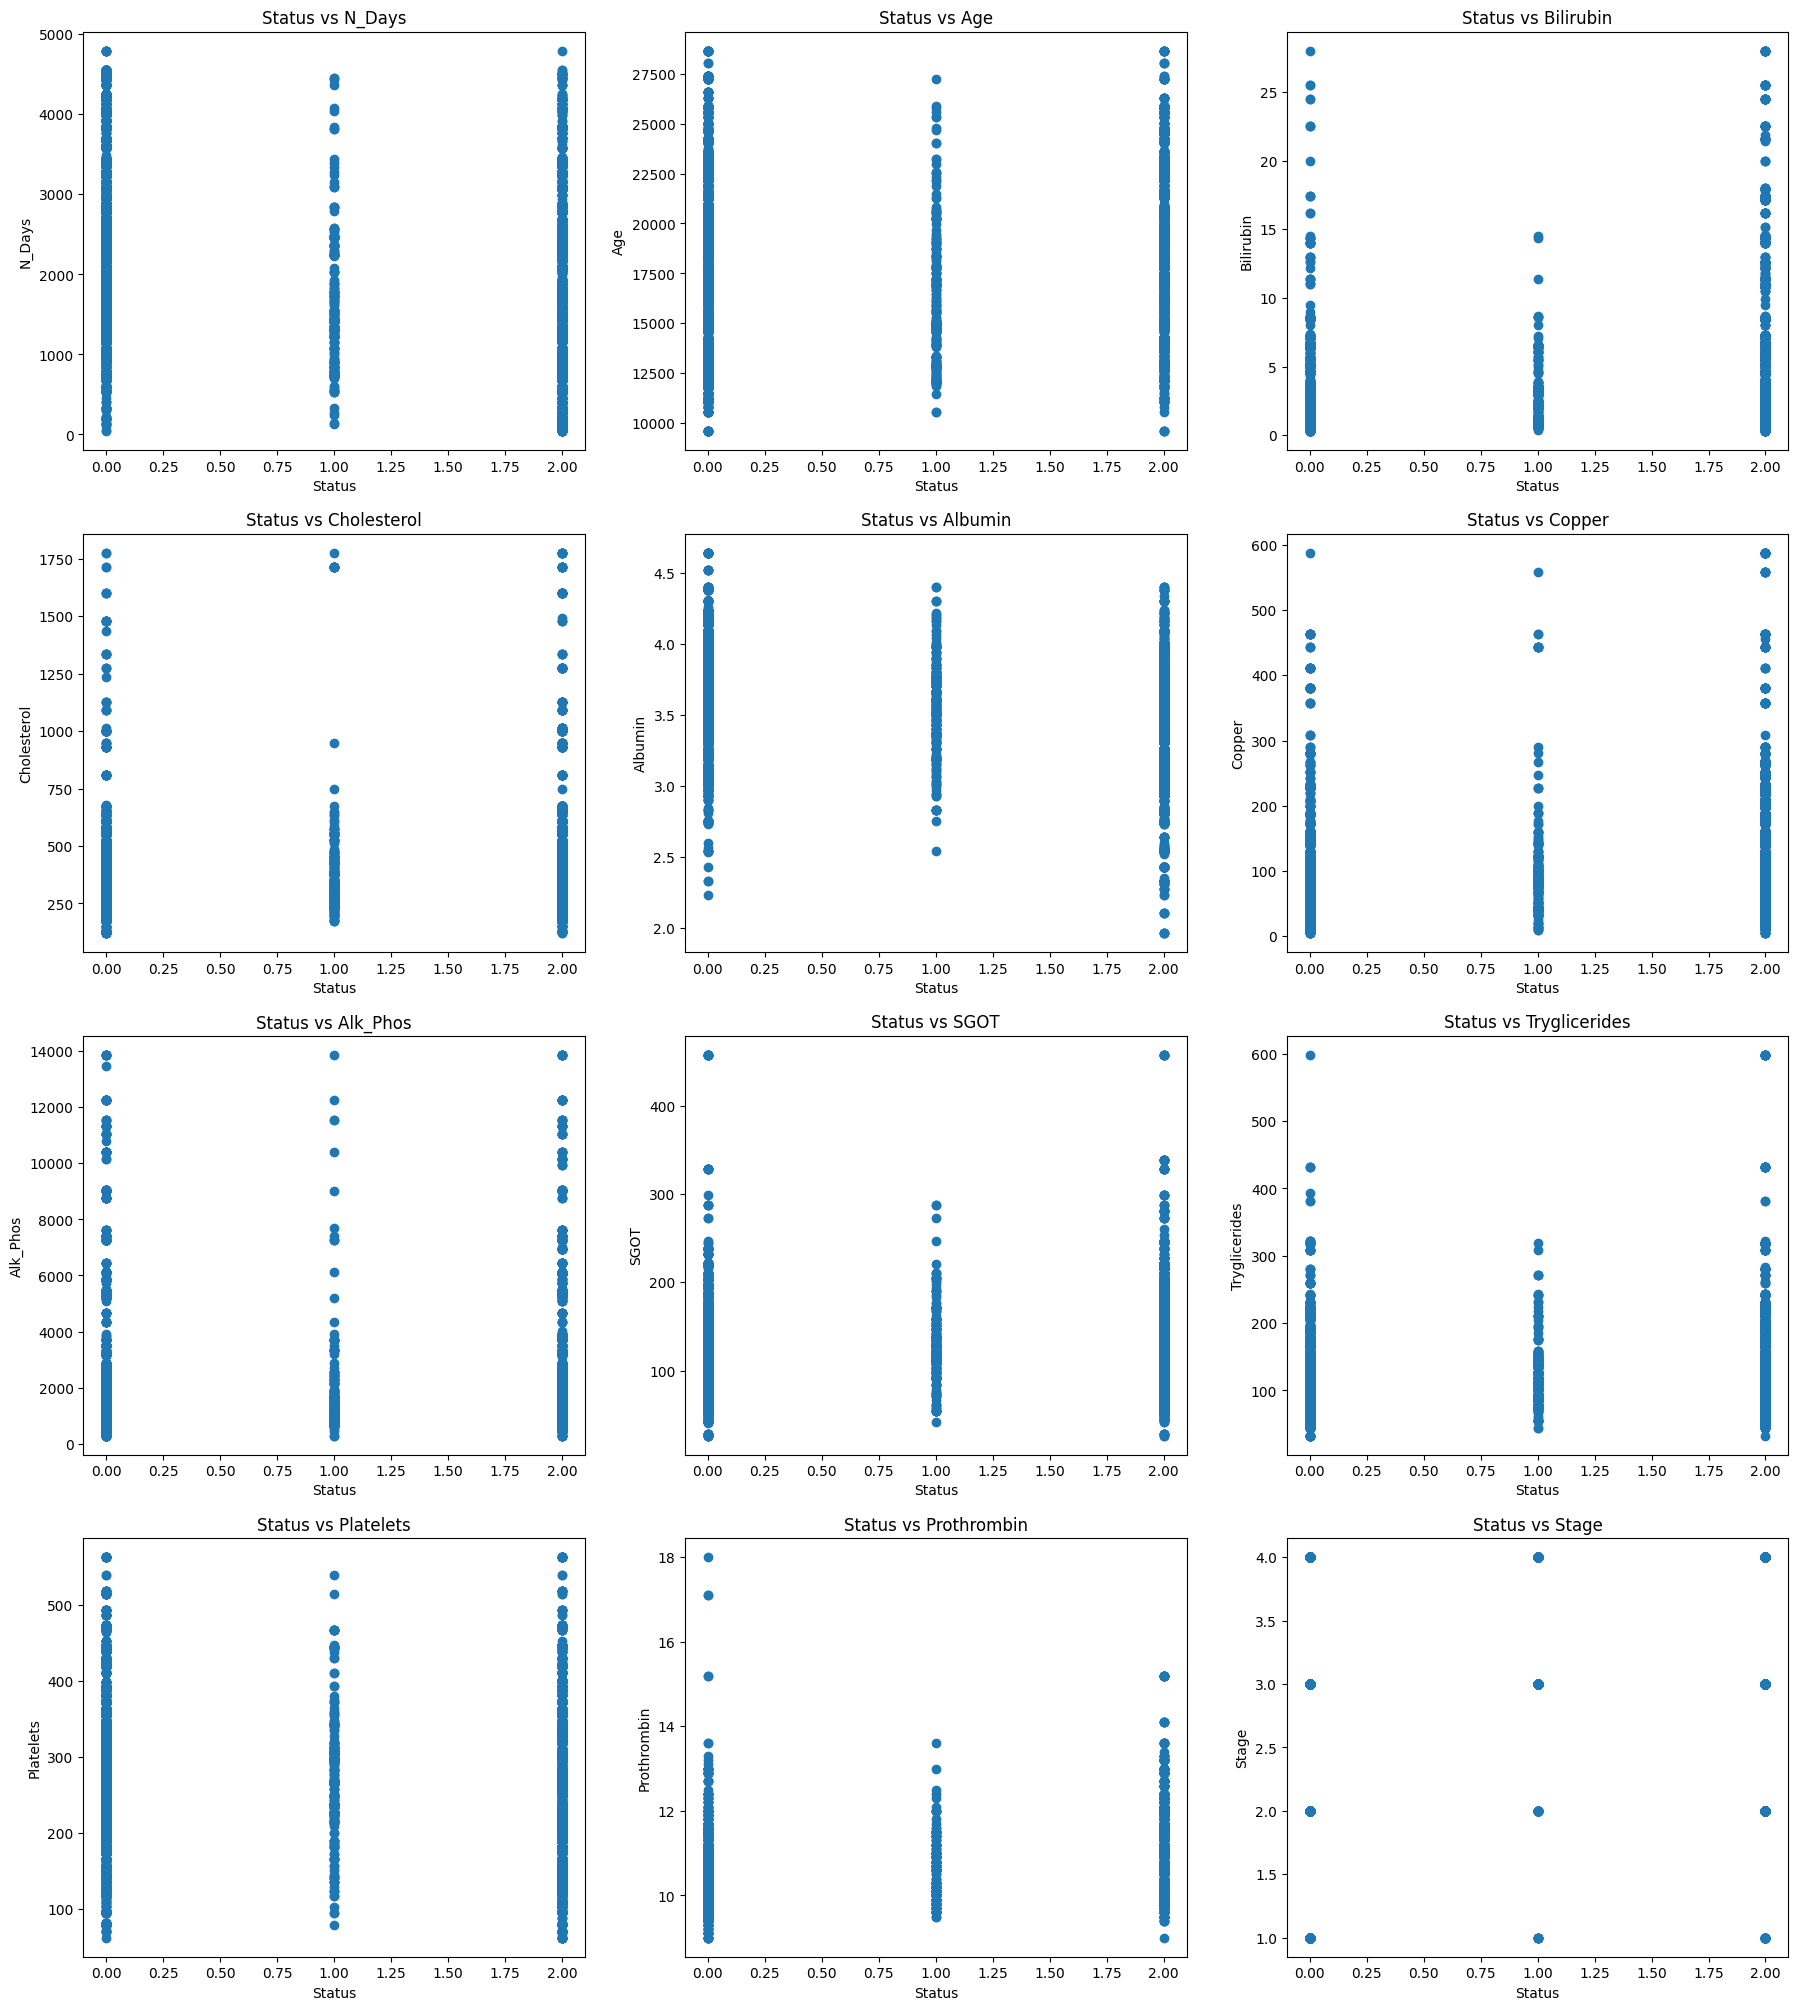

In [14]:
fig, axs = plt.subplots(4, 3, figsize=(22, 25))
axs[0, 0].scatter(cirrhosis_df_encoded['Status'],cirrhosis_df_encoded['N_Days'])
axs[0, 0].set_title("Status vs N_Days")
axs[0, 0].set_xlabel("Status")
axs[0, 0].set_ylabel("N_Days")
axs[0, 1].scatter(cirrhosis_df_encoded['Status'], cirrhosis_df_encoded['Age'])
axs[0, 1].set_title("Status vs Age")
axs[0, 1].set_xlabel("Status")
axs[0, 1].set_ylabel("Age")
axs[0, 2].scatter(cirrhosis_df_encoded['Status'],cirrhosis_df_encoded['Bilirubin'])
axs[0, 2].set_title("Status vs Bilirubin")
axs[0, 2].set_xlabel("Status")
axs[0, 2].set_ylabel("Bilirubin")
axs[1, 0].scatter(cirrhosis_df_encoded['Status'],cirrhosis_df_encoded['Cholesterol'])
axs[1, 0].set_title("Status vs Cholesterol")
axs[1, 0].set_xlabel("Status")
axs[1, 0].set_ylabel("Cholesterol")
axs[1, 1].scatter(cirrhosis_df_encoded['Status'],cirrhosis_df_encoded['Albumin'])
axs[1, 1].set_title("Status vs Albumin")
axs[1, 1].set_xlabel("Status")
axs[1, 1].set_ylabel("Albumin")
axs[1, 2].scatter(cirrhosis_df_encoded['Status'], cirrhosis_df_encoded['Copper'])
axs[1, 2].set_title("Status vs Copper")
axs[1, 2].set_xlabel("Status")
axs[1, 2].set_ylabel("Copper")
axs[2, 0].scatter(cirrhosis_df_encoded['Status'], cirrhosis_df_encoded['Alk_Phos'])
axs[2, 0].set_title("Status vs Alk_Phos")
axs[2, 0].set_xlabel("Status")
axs[2, 0].set_ylabel("Alk_Phos")
axs[2, 1].scatter(cirrhosis_df_encoded['Status'], cirrhosis_df_encoded['SGOT'])
axs[2, 1].set_title("Status vs SGOT")
axs[2, 1].set_xlabel("Status")
axs[2, 1].set_ylabel("SGOT")
axs[2, 2].scatter(cirrhosis_df_encoded['Status'], cirrhosis_df_encoded['Tryglicerides'])
axs[2, 2].set_title("Status vs Tryglicerides")
axs[2, 2].set_xlabel("Status")
axs[2, 2].set_ylabel("Tryglicerides")
axs[3, 0].scatter(cirrhosis_df_encoded['Status'], cirrhosis_df_encoded['Platelets'])
axs[3, 0].set_title("Status vs Platelets")
axs[3, 0].set_xlabel("Status")
axs[3, 0].set_ylabel("Platelets")
axs[3, 1].scatter(cirrhosis_df_encoded['Status'], cirrhosis_df_encoded['Prothrombin'])
axs[3, 1].set_title("Status vs Prothrombin")
axs[3, 1].set_xlabel("Status")
axs[3, 1].set_ylabel("Prothrombin")
axs[3, 2].scatter(cirrhosis_df_encoded['Status'], cirrhosis_df_encoded['Stage'])
axs[3, 2].set_title("Status vs Stage")
axs[3, 2].set_xlabel("Status")
axs[3, 2].set_ylabel("Stage")

In [15]:
X = cirrhosis_df_encoded.drop(columns=["Status"])
y = cirrhosis_df_encoded[["Status"]]

In [16]:
cirrhosis_df_test = pd.read_csv("/kaggle/input/playground-series-s3e26/test.csv")
#cirrhosis_df_test = pd.read_csv("C:\\Users\\parim\\Downloads\\MC_Cirrhosis Outcomes\\test.csv")
cirrhosis_df_test.shape

(5271, 19)

In [17]:
cirrhosis_df_test.head(2)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.9,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.9,155.0,227.0,10.0,2.0


In [18]:
test_categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
cirrhosis_df_test_encoded=pd.get_dummies(cirrhosis_df_test, columns=test_categorical_cols, dtype=int)
cirrhosis_df_test_encoded.head(2)

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,7905,3839,19724,1.2,546.0,3.37,65.0,1636.0,151.9,90.0,...,0,1,0,0,1,1,0,1,0,0
1,7906,2468,14975,1.1,660.0,4.22,94.0,1257.0,151.9,155.0,...,0,1,0,1,0,1,0,1,0,0


In [19]:
X.columns

Index(['id', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Drug_D-penicillamine', 'Drug_Placebo', 'Sex_F', 'Sex_M',
       'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y',
       'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y'],
      dtype='object')

In [20]:
cirrhosis_df_test_encoded.columns

Index(['id', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Drug_D-penicillamine', 'Drug_Placebo', 'Sex_F', 'Sex_M',
       'Ascites_N', 'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y',
       'Spiders_N', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y'],
      dtype='object')

Applied algorithms like OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier, GaussianNB, XGBoostClassifier, DecisionTreeClassifier, RandomForestClassifier. 

Section 1: 
OneVsOneClassifier training accuracy: 0.76
OneVsRestClassifier training accuracy: 0.76
OutputCodeClassifier training accuracy: 0.96
GaussianNB training accuracy: 0.72

Section 2: 
XGBoostClassifier training accuracy: 0.99
DecisionTreeClassifier training accuracy: 1.0
RandomForestClassifier training accuracy: 1.0 

In [21]:
XGBClassifier_clf = XGBClassifier(objective="multi:softmax", num_class=3, random_state=42)
XGBClassifier_clf.fit(X, y)
xgb_train_pred = XGBClassifier_clf.predict(X)
xgb_train_pred_proba = XGBClassifier_clf.predict_proba(X)
y_pred = XGBClassifier_clf.predict_proba(cirrhosis_df_test_encoded)

xgbclassifier_train_acc = accuracy_score(y, xgb_train_pred)
print(f"XGBClassifier's training accuracy: {xgbclassifier_train_acc}")
print(f"XGBClassifier train pred : {np.round(xgb_train_pred, 2)}")
print(f"XGBClassifier test pred : {np.round(y_pred, 2)}")



XGBClassifier's training accuracy: 0.9953194180898166
XGBClassifier train pred : [2 0 2 ... 2 2 0]
XGBClassifier test pred : [[0.2  0.01 0.8 ]
 [0.62 0.17 0.21]
 [0.01 0.   0.99]
 ...
 [0.94 0.   0.06]
 [1.   0.   0.  ]
 [0.11 0.   0.89]]


In [22]:
decisionTreeClf = DecisionTreeClassifier(class_weight="balanced", random_state=42)
decisionTreeClf.fit(X, y)
decisionTreeClf_train_pred = decisionTreeClf.predict(X)
decisionTreeClf_train_pred_prob = decisionTreeClf.predict_proba(X)

decisionTreeClf_test_pred_prob = decisionTreeClf.predict_proba(cirrhosis_df_test_encoded)
decisionTreeClf_train_acc = accuracy_score(y, decisionTreeClf_train_pred)
print(f"DecisionTreeClassifier's training accuracy: {decisionTreeClf_train_acc}")
print(f"OutputCodeClf_train_pred: {decisionTreeClf_train_pred_prob[1]}")
print(f"OutputCodeClf_test_pred: {decisionTreeClf_test_pred_prob[1]}")

DecisionTreeClassifier's training accuracy: 1.0
OutputCodeClf_train_pred: [1. 0. 0.]
OutputCodeClf_test_pred: [1. 0. 0.]


In [23]:
randomForestClf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
randomForestClf.fit(X, y)
randomForestClf_train_pred = randomForestClf.predict(X)
randomForestClf_train_pred_prob = randomForestClf.predict_proba(X)
randomForestClf_test_pred_prob = randomForestClf.predict_proba(cirrhosis_df_test_encoded)
randomForestClf_train_acc = accuracy_score(y, randomForestClf_train_pred)
print(f"Random Forest training accuracy: {randomForestClf_train_acc}")
print(f"Random Forest classifier's train predict probability: {randomForestClf_train_pred_prob}")
print(f"Random Forest classifier's test predict probability: {randomForestClf_test_pred_prob}")

C:\Users\parim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest training accuracy: 0.9998734977862113
Random Forest classifier's train predict probability: [[0.04 0.   0.96]
 [0.9  0.02 0.08]
 [0.03 0.   0.97]
 ...
 [0.11 0.   0.89]
 [0.29 0.   0.71]
 [0.93 0.   0.07]]
Random Forest classifier's test predict probability: [[0.71 0.04 0.25]
 [0.75 0.08 0.17]
 [0.21 0.03 0.76]
 ...
 [0.88 0.01 0.11]
 [0.93 0.03 0.04]
 [0.56 0.03 0.41]]


Best performing algorithm:
1. RandomForestClassifier with train accuracy 0.999
2. DecisionTreeClassifier with train accuracy 1.0
3. XGBoost Classifier with train accuracy 0.995

Applying ensemble methods to predict the test dataset. 

In [24]:
#Applying ensemble methods 

XGBClassifier_EnClf = XGBClassifier(objective="multi:softmax", num_class=3, random_state=42)
decisionTree_EnClf = DecisionTreeClassifier(class_weight="balanced", random_state=42)
randomForest_EnClf = RandomForestClassifier(class_weight="balanced", random_state=42)

estimators_ensemble = [("XGB Classifier", XGBClassifier_EnClf),
                       ("decision_tree", decisionTree_EnClf),
                       ("random_forest", randomForest_EnClf)
                    ]

y=y.values.ravel()
ensemble_method = VotingClassifier(estimators=estimators_ensemble, voting="soft")
ensemble_method.fit(X, y)
ensemble_train_pred = ensemble_method.predict(X)
ensemble_train_pred_prob = ensemble_method.predict_proba(X)
ensemble_train_acc = accuracy_score(y, ensemble_train_pred)

ensemble_test_pred_prob = ensemble_method.predict_proba(cirrhosis_df_test_encoded)

print(f"Ensemble method's training accuracy: {ensemble_train_acc}")
print(f"Ensemble's test predictions: {ensemble_test_pred_prob}")


Ensemble method's training accuracy: 1.0
Ensemble's test predictions: [[0.30174209 0.01528676 0.68297116]
 [0.79038525 0.08316073 0.126454  ]
 [0.07240938 0.01018064 0.91741   ]
 ...
 [0.93877957 0.00366598 0.05755444]
 [0.64314037 0.01004457 0.34681508]
 [0.55602926 0.01115701 0.43281372]]


In [25]:
classes_arr = ['Status_C', 'Status_CL', 'Status_D']
pred_classes_df = pd.DataFrame(randomForestClf_test_pred_prob, columns=classes_arr)
id = cirrhosis_df_test_encoded['id']
final_df = pd.concat([id, pred_classes_df], axis=1)
final_df = final_df.set_index('id')
#final_df.to_csv("prediction_probability.csv")